# Environment & Data Preparation

## Index

1. [Environment](#1_Environment)



2. [Data Preparation](#2_Data_Preparation)
    
   2.1 [Data Wrangling](#2.1_Data_Wrangling)
      - Explore Data
      - Clean Data
      - Transform Data
   
   2.2 [Feature Selection](#2.2_Feature_Selection)
      - Correlation
      - Delete not useful variables
   
   2.3 [Feature Engineering](#2.3_Feature_Engineering)
      - Creat new columns
      - Log transformation
      - StandardScaler


______

# 1_Environment

### Import libraries

In [1]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Maths
import math
from scipy import stats

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# plt.rcParams["figure.figsize"] = (16,8)
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D

# Outliers
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split

# Feature engineering
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler 

### Import data

In [2]:
churn= pd.read_csv("Churn_Modelling.csv")

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# a = churn.copy()
# a.head()

# 2_Data_Preparation

## 2.1_Data_Wrangling

### Explore Data

#### Metadata

**RowNumber** — corresponds to the record (row) number and has no effect on the output. This column will be removed.

**CustomerId** — contains random values and has no effect on customer leaving the bank. This column will be removed.

**Surname** — the surname of a customer has no impact on their decision to leave the bank. This column will be removed.

**CreditScore** — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

**Geography** — a customer’s location can affect their decision to leave the bank. We’ll keep this column.

**Gender** — it’s interesting to explore whether gender plays a role in a customer leaving the bank. We’ll include this column, too.

**Age** — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

**Tenure** — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

**Balance** — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

**NumOfProducts** — refers to the number of products that a customer has purchased through the bank.

**HasCrCard** — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank. (0=No,1=Yes)

**IsActiveMember** — active customers are less likely to leave the bank, so we’ll keep this. (0=No,1=Yes)

**EstimatedSalary** — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

**Exited** — whether or not the customer left the bank. This is what we have to predict. (0=No,1=Yes)


#### Variables info

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# check variables (numeric & categoric)
numeric= churn.select_dtypes(include=np.number)

In [7]:
numeric

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,1


In [8]:
categoric= churn.select_dtypes(exclude=np.number)
categoric

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


#### Outliers

#### Boxplots and Interquartile Range (IQR)

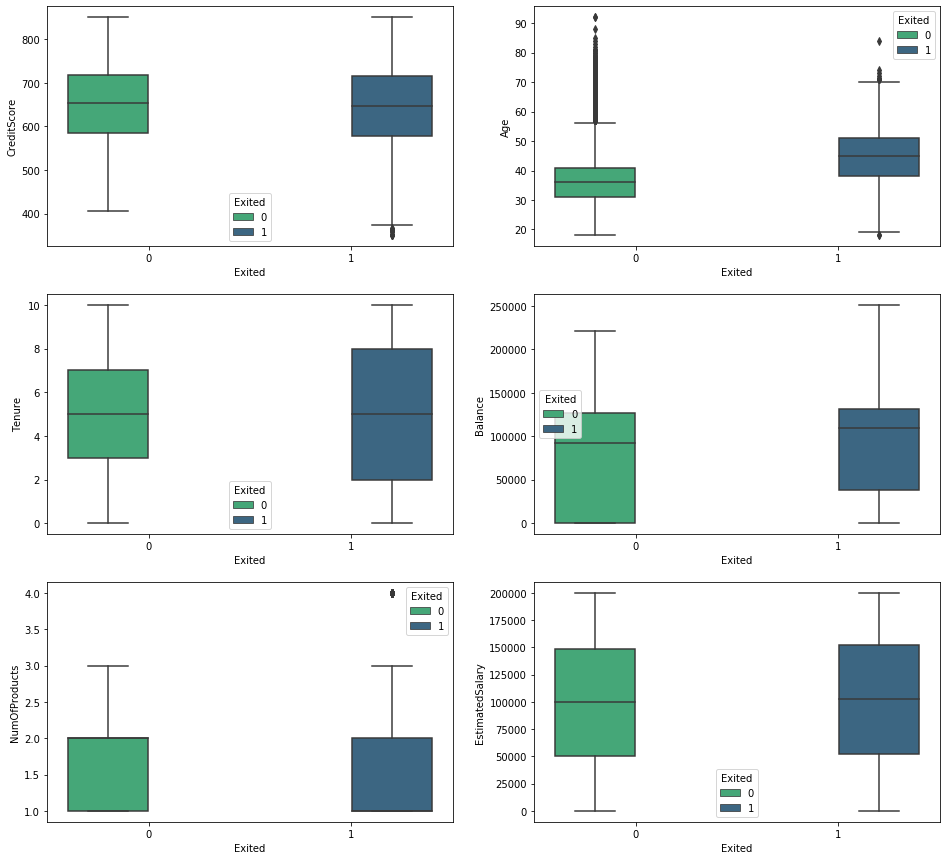

In [9]:
# Check & visualise outliers with boxplot

fig, axarr = plt.subplots(3, 2, figsize=(16, 15))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[0][0], palette="viridis_r")
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = churn , ax=axarr[0][1], palette="viridis_r")
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][0], palette="viridis_r")
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[1][1], palette="viridis_r")
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][0], palette="viridis_r")
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = churn, ax=axarr[2][1], palette="viridis_r");

Distribution between clients retained and churned
CreditScore: There is no significant difference between clients retained and churned
Age: Older clients are more likely to leave the bank
Tenure: Not informtive
Balance: Not informative
NumOfProducts: Not informative
EstimatedSalary: Not informative

Outliers
CreditScore, Age and NumOfProducts outliers

In [10]:
# Check Outliers through quantile
for feature in churn[['CreditScore','Age', "Tenure","Balance", 'NumOfProducts', "EstimatedSalary"]]:
    Q1 = churn[feature].quantile(0.25)
    Q3 = churn[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    if churn[(churn[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

CreditScore no
Age yes
Tenure no
Balance no
NumOfProducts yes
EstimatedSalary no


In [11]:
# check deeply outliers of NumOfProductshave

Q1 = churn['NumOfProducts'].quantile(0.25)
Q3 = churn['NumOfProducts'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)

3.5


In [12]:
# outliers of NumOfProductshave Shape
outliers_NumOfProducts= churn.loc[churn.NumOfProducts>=3.5]
outliers_NumOfProducts.shape

(60, 14)

In [13]:
# check deeply outliers of Age

Q1 = churn['Age'].quantile(0.25)
Q3 = churn['Age'].quantile(0.75)
IQR = Q3-Q1
lower = Q1- 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)

62.0


In [14]:
# outliers of Age shape
outliers_age= churn.loc[churn.Age>=62]
outliers_age.shape

(411, 14)

We've seen we have outliers in Age & NumOfProductshave, but we will check outliers deeply below with other techniques.

#### Distribution

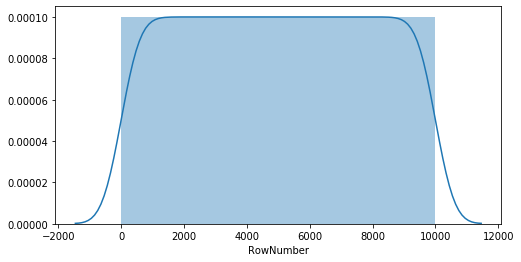

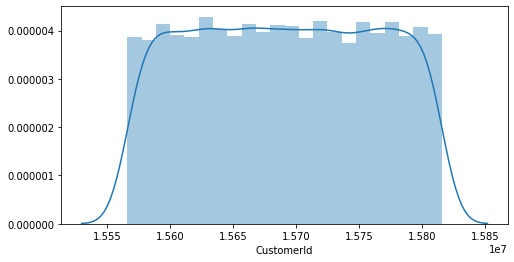

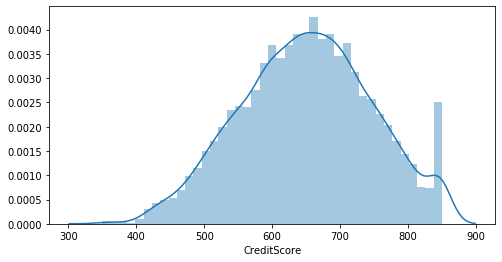

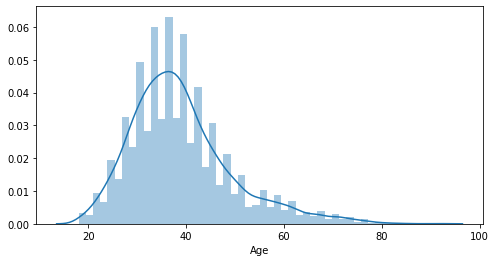

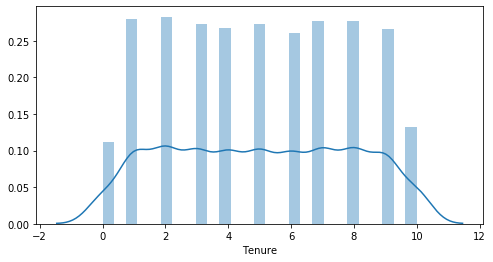

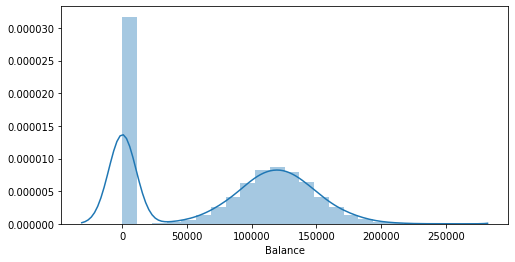

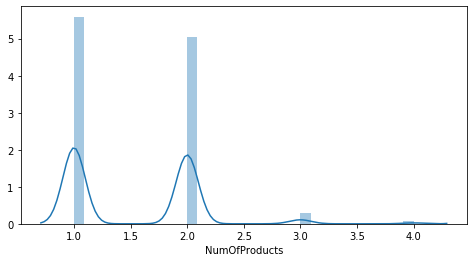

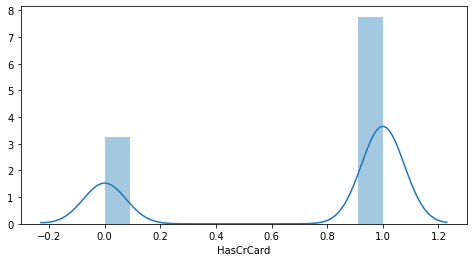

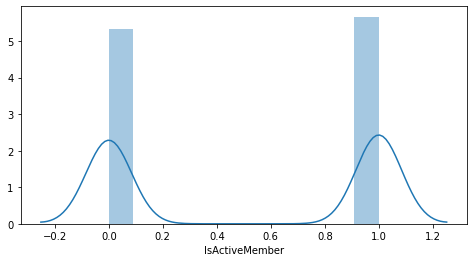

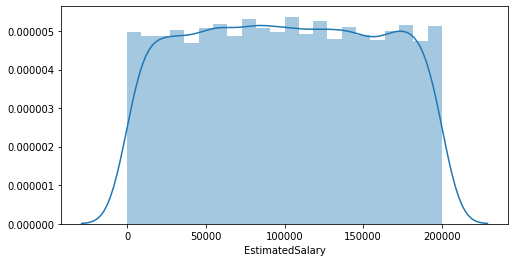

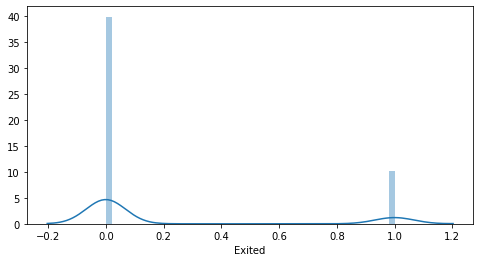

In [15]:
# Column-wise data distribution (to see if there is any distribution skewed)

for i in numeric:
    plt.figure(figsize=(8,4))
    sns.distplot(churn[i])

We see that most of the variables don't have a normal distribution and the ones that have normal distribution is skewed.

### Clean Data

In [16]:
# check Nan values
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Transform Data

#### Creat dummy variables

In [17]:
# check unique values column Gender
churn.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [18]:
# check unique values column Geography
churn.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [19]:
# Create a new column with Gender dummy varibale
churn["Gender_Int"]= [0 if value == "Male" else 1 for value in churn["Gender"]]

In [20]:
# Get dummies from column Geography
churn=pd.get_dummies(churn, columns=['Geography'],drop_first=True )

In [21]:
# Get dummies from column Balance and creat new column with them
churn["Balance_Int"]= [0 if value == 0.00 else 1 for value in churn["Balance"]]

In [22]:
# check changes in dataset
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,1,15634602,Hargrave,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,2,15647311,Hill,608,Female,41,1,83807.86,1,0,1,112542.58,0,1,0,1,1
2,3,15619304,Onio,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,4,15701354,Boni,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,5,15737888,Mitchell,850,Female,43,2,125510.82,1,1,1,79084.10,0,1,0,1,1


## 2.2_Feature_Selection

### Remove useless variables

In [23]:
# check unique values CustomerId
churn.CustomerId.value_counts()

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

In [24]:
# drop useless columns 
churn.drop(columns=[ "Gender","RowNumber", "CustomerId", "Surname"], inplace=True)

In [25]:
# check dataset
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,1


### Correlation

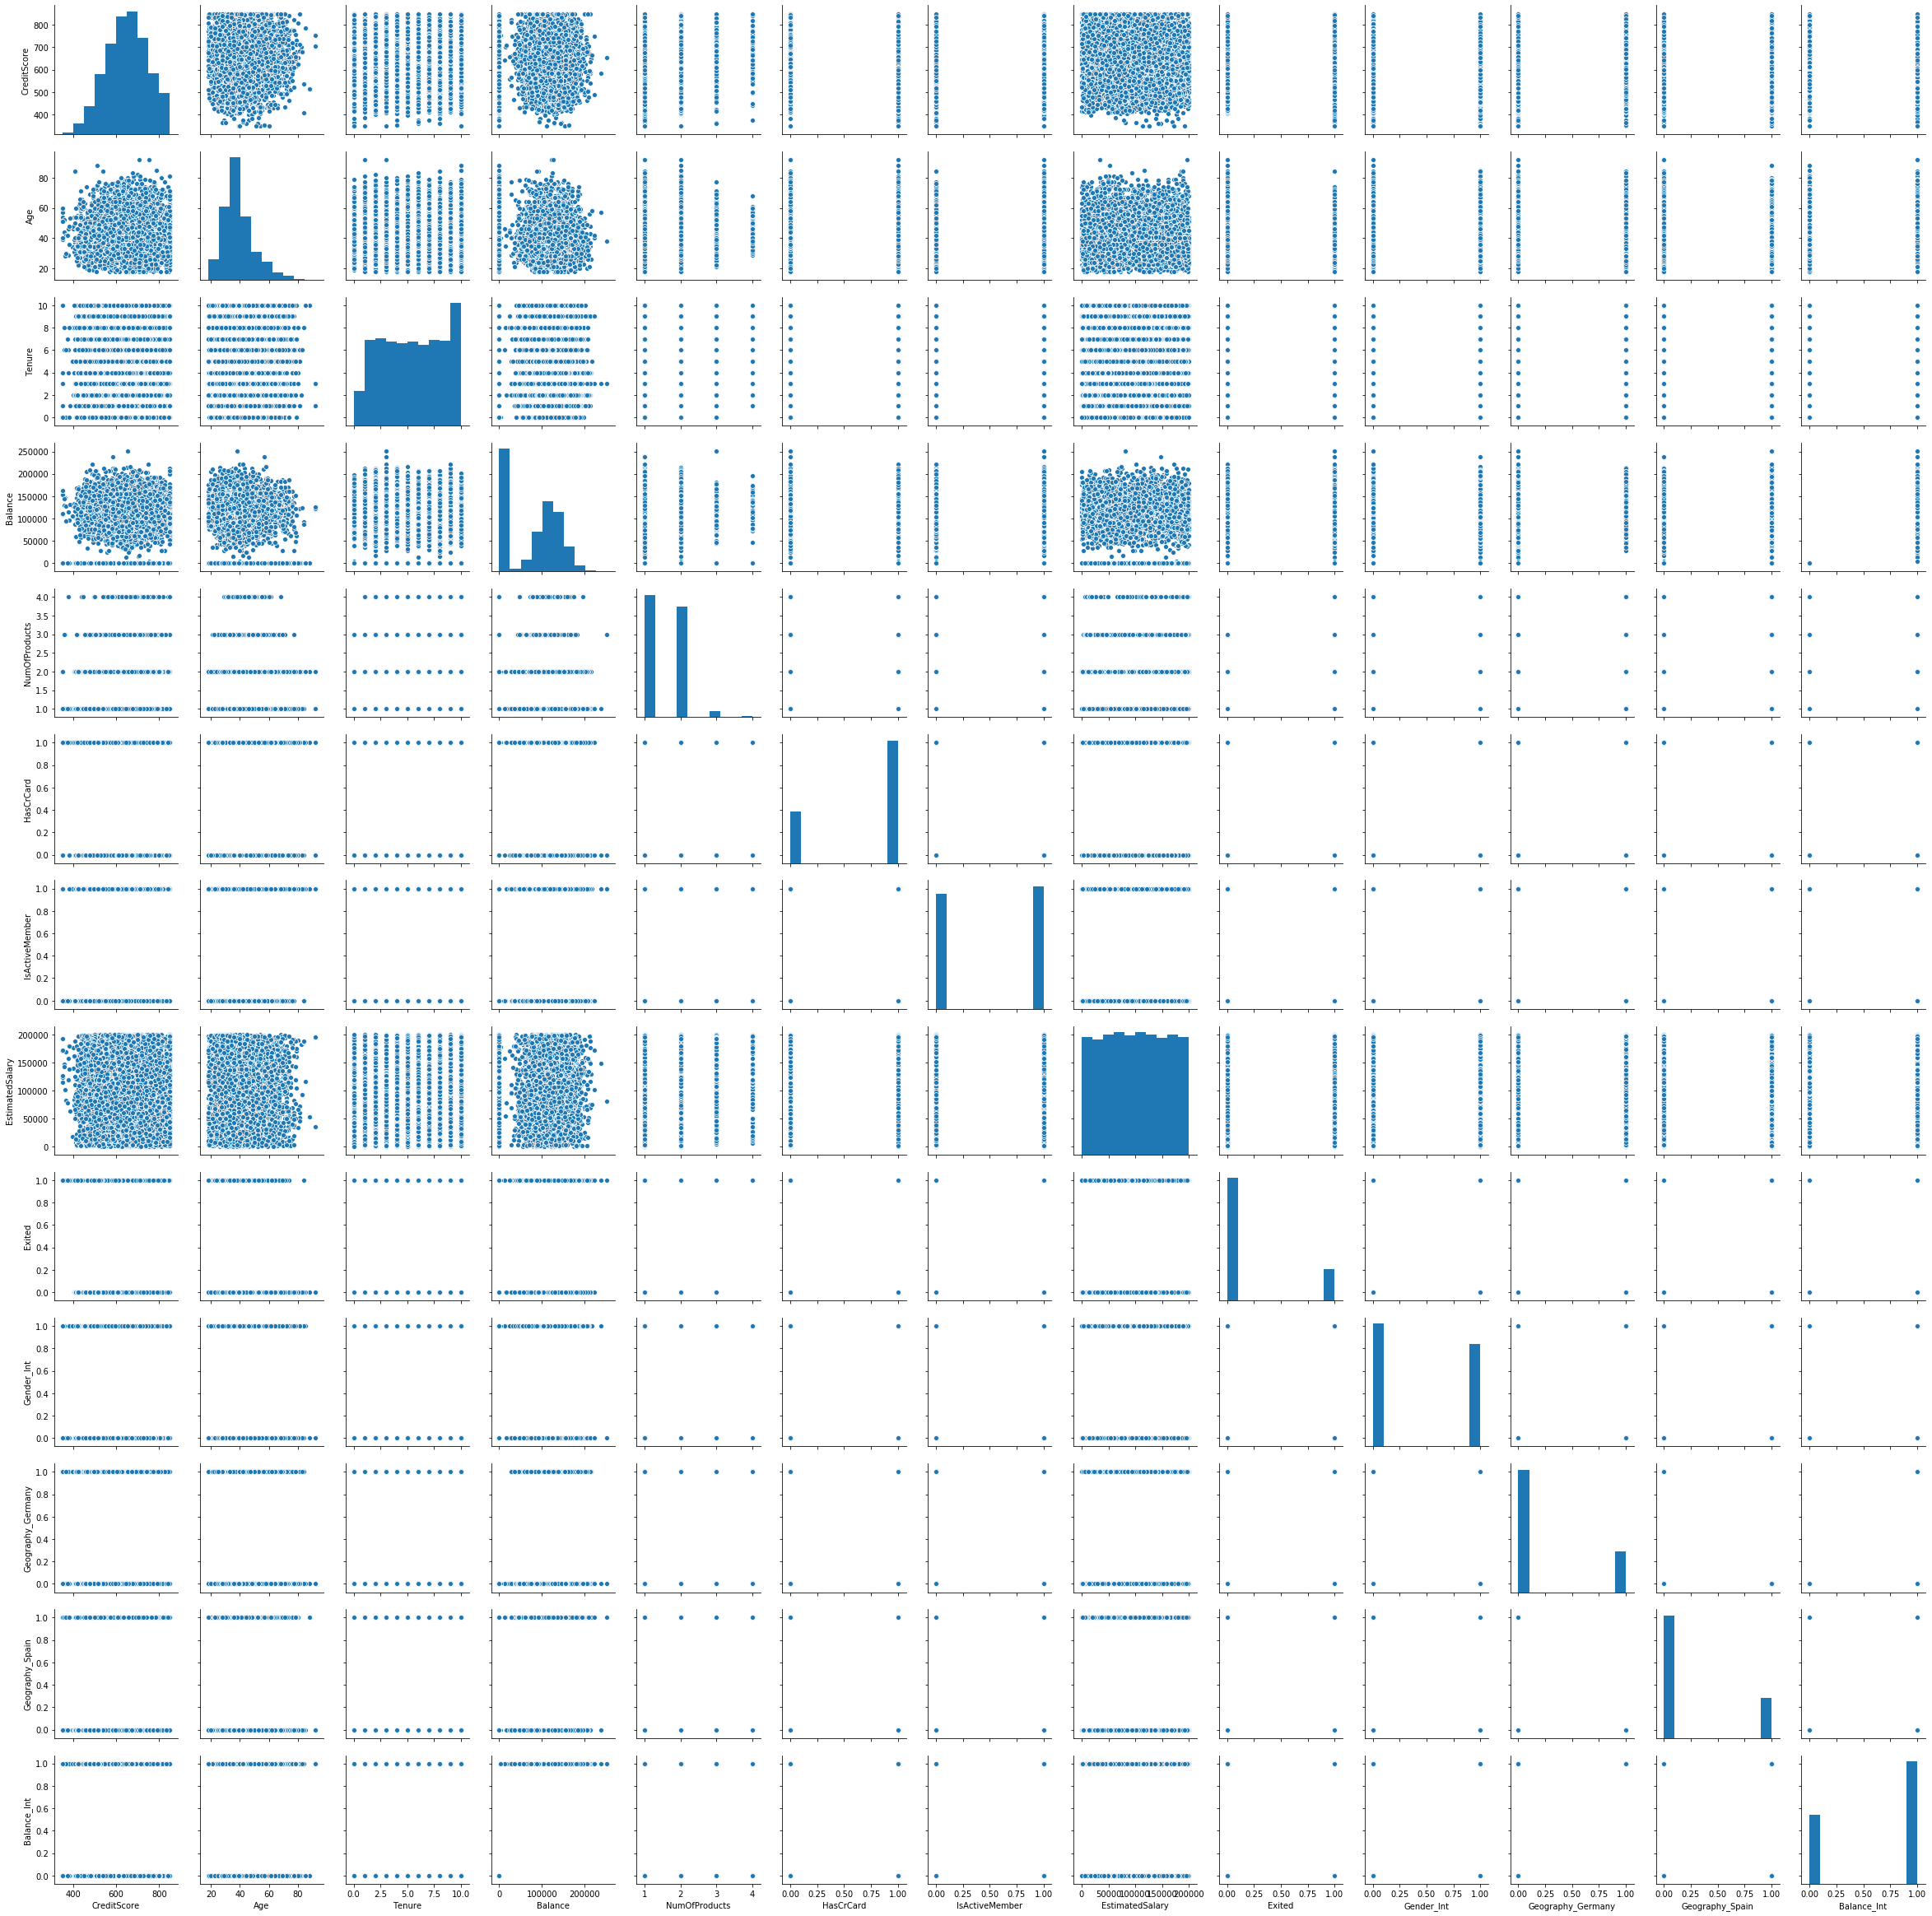

In [26]:
# Check correlation with pairplot
sns.pairplot(churn);

In [27]:
# Check variables closer

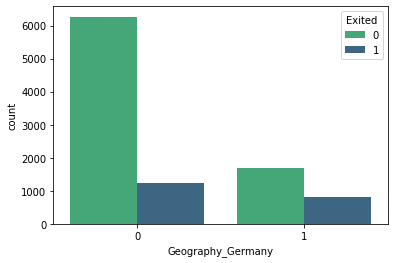

In [28]:
# Geography_Germany vs Exited 
sns.countplot(data=churn, x="Geography_Germany", hue="Exited", palette="viridis_r");

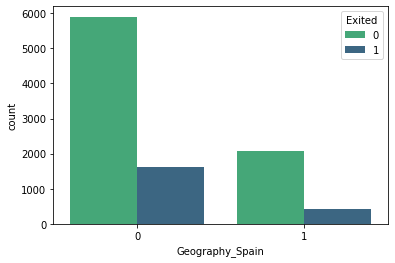

In [29]:
# Geography_Spain vs Exited 
sns.countplot(data=churn, x="Geography_Spain", hue="Exited", palette="viridis_r");

The bank has more clients from France.
Proportionally, more clients from Germany are leaving the bank.

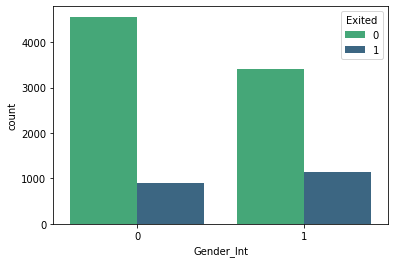

In [30]:
# Gender vs Exited 
sns.countplot(data=churn, x="Gender_Int", hue="Exited", palette="viridis_r");

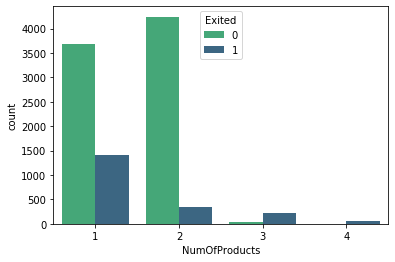

In [31]:
# NumOfProducts vs Exited 
sns.countplot(data=churn, x="NumOfProducts", hue="Exited", palette="viridis_r");

Clients usually have 1 or 3 products.

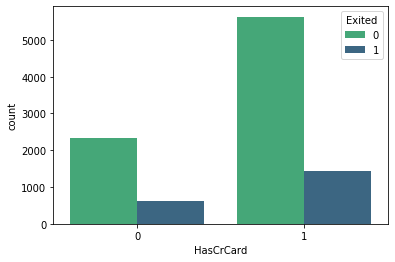

In [32]:
# HasCrCard vs Exited 
sns.countplot(data=churn, x="HasCrCard", hue="Exited", palette="viridis_r");

Mayority of clients with credit card are likely to leave.

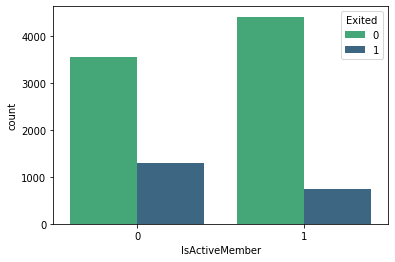

In [33]:
# IsActiveMember vs Exited 
sns.countplot(data=churn, x="IsActiveMember", hue="Exited", palette="viridis_r");

Inactive clients are likely to leave.

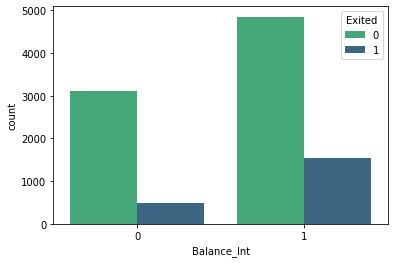

In [34]:
# IsActiveMember vs Exited 
sns.countplot(data=churn, x="Balance_Int", hue="Exited", palette="viridis_r");

Clients who leave the bank usually have 0 balance.

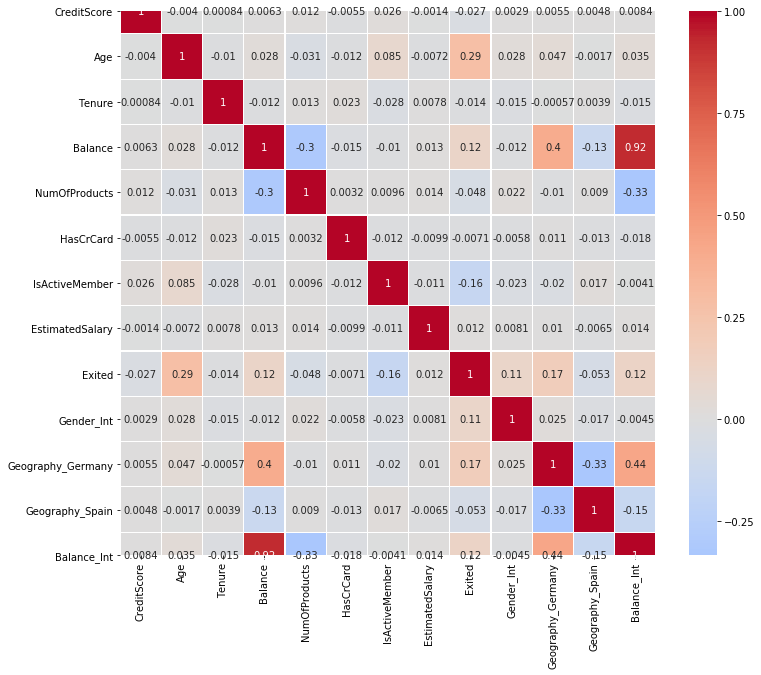

In [35]:
# Check correlation & check if we have collinearity
plt.subplots(figsize=(12,10))
sns.heatmap(churn[churn.columns].corr(),linewidths =0.2 ,cmap = 'coolwarm',center = 0,annot = True)
plt.yticks(rotation = 0);

We see collinearity between Balance and Balance_Int (column created) as expected. 
We will have to select one or the other when doing the Models.

Also we see some correlation between Germany, although it quite is low.

In [36]:
# check dataset before Feature Engineering
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,1


In [37]:
# Save clean data to csv
churn.to_csv("Churn_Clean.csv", index=False)

#### Outliers

#### Isolation Forest

Isolation Forest is an unsupervised learning algorithm that belongs to the ensemble decision trees family.

It explicitly isolates anomalies instead of profiling and constructing normal points and regions by assigning a score to each data point.

In [38]:
def isolation_forest(df,X):
    
    '''
    Function that identifies anomalies using isolation forest.
    '''
    
    # Fit the model
    clf=IsolationForest(behaviour='new', contamination = float(0.1))
    clf.fit(X)

    # Predict the model
    pred = clf.predict(X)
    df['Anomaly'] = pred

    # Outliers
    outliers = df.loc[df['Anomaly']==-1]
    outlier_index=list(outliers.index)
    #print(outlier_index)

    #Find the number of anomalies and normal points. Here points classified -1 are anomalous
    return df['Anomaly'].value_counts(), outlier_index,df['Anomaly']

Create a copy of the dataset to visualize the isolation forest.

In [39]:
churn_isolation_forest = churn.copy()

In [40]:
# Data 
X = churn_isolation_forest.drop(['Exited'],axis=1)
y = churn_isolation_forest['Exited']

In [41]:
# Isolation Forest data normalized
anomalies_churn = isolation_forest(churn_isolation_forest,X)[0]
outliers_churn = isolation_forest(churn_isolation_forest,X)[1]
anomalies_churn

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning:

'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/_iforest.py:255: FutureWarning:

'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.



 1    9000
-1    1000
Name: Anomaly, dtype: int64

#### Visualization

In [42]:
churn_isolation_forest.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,Anomaly
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,1,1


In [43]:
# We use most significant columns to visualize isolation forest
cif = churn_isolation_forest[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Gender_Int','Exited','Anomaly']]
cif.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Int,Exited,Anomaly
0,619,42,2,0.00,1,1,1,101348.88,1,1,1
1,608,41,1,83807.86,1,0,1,112542.58,1,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,1,0,1


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density. Either provide the bandwidth during initialization or use an alternative method.

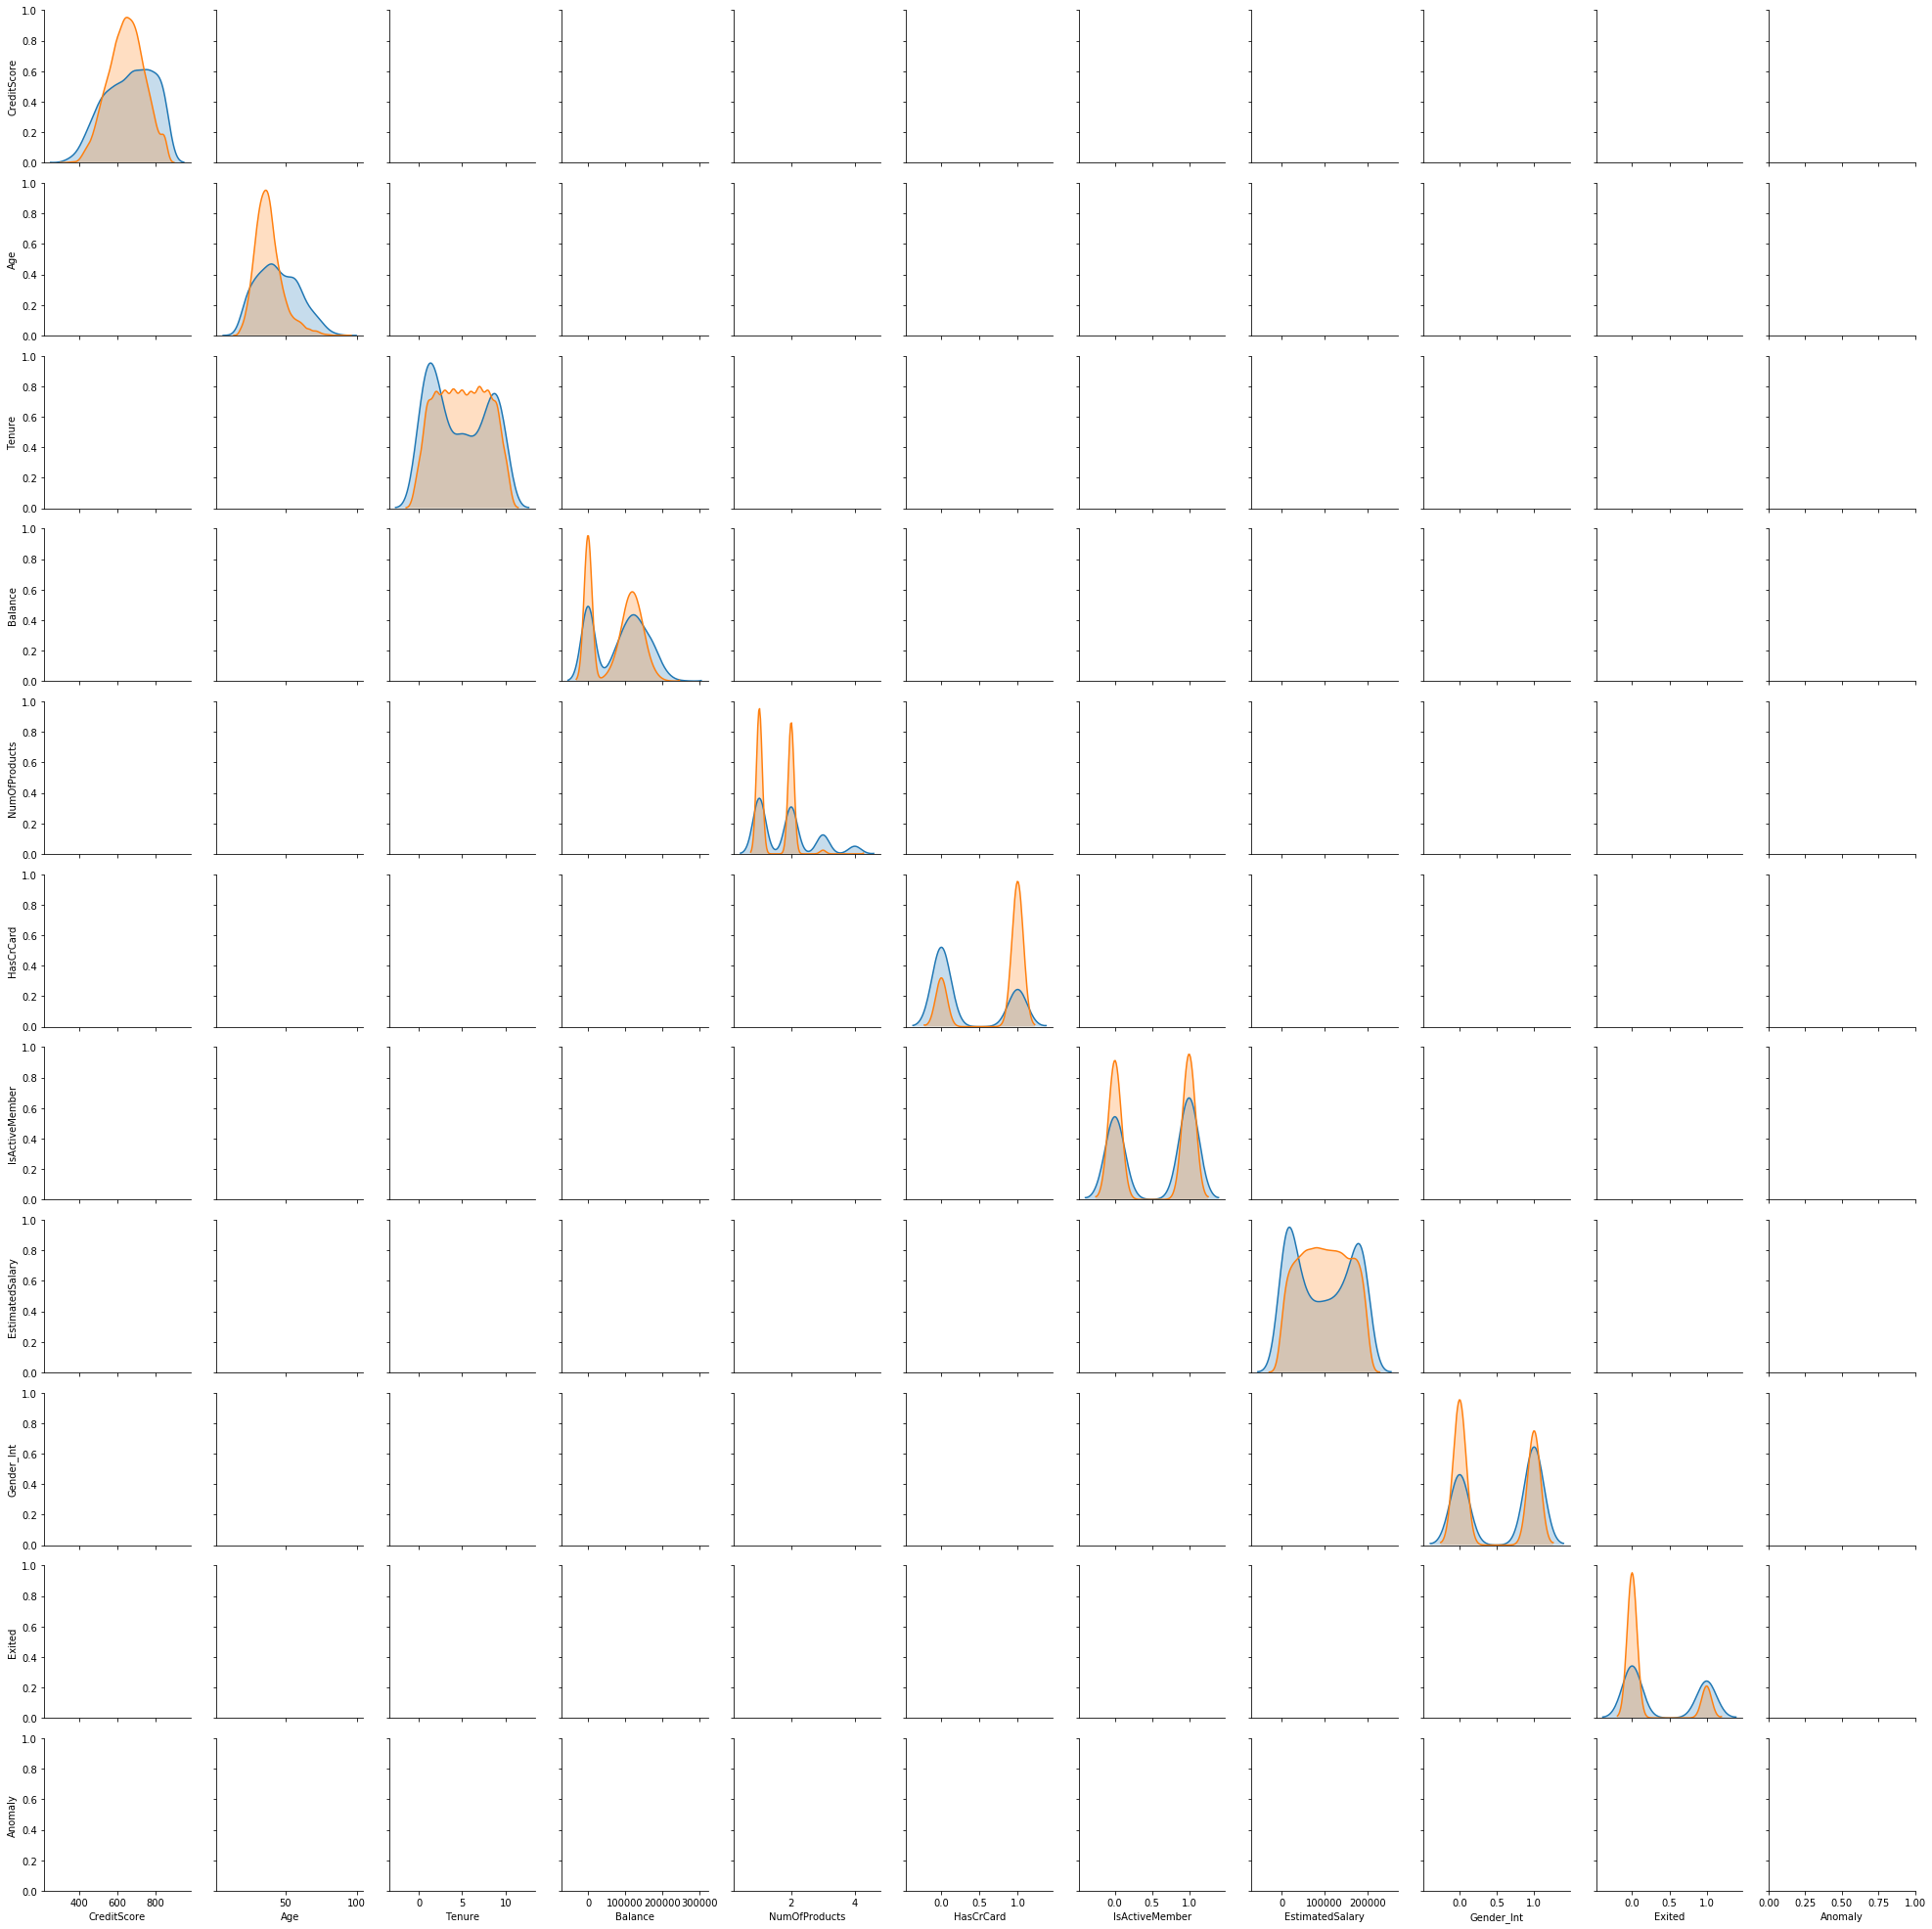

In [44]:
sns.pairplot(cif, hue='Anomaly');

With the previous analysis, we've seen we have outliers in Age & NumOfProductshave.
The isolation forest confirms these outliers but we choose not to consider them beacause they seem to be not relevant.

## 2.3_Feature_Engineering

### Transfrom (log)

In [45]:
# We'll only transform 2 columns ("Age" & "CreditScore") to log, 
# as are the only ones that seem to have a normal distribution but skewed.

churn_log=churn[["CreditScore","Age"]].applymap(np.log)

In [46]:
frames= [churn_log,churn[["Tenure","Balance","NumOfProducts","HasCrCard","IsActiveMember","EstimatedSalary","Exited","Gender_Int","Geography_Germany","Geography_Spain", "Balance_Int"]]]
churn_log = pd.concat(frames, axis=1, sort=False)

In [47]:
churn_log

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,6.428105,3.737670,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,6.410175,3.713572,1,83807.86,1,0,1,112542.58,0,1,0,1,1
2,6.218600,3.737670,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,6.549651,3.663562,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,6.745236,3.761200,2,125510.82,1,1,1,79084.10,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,6.647688,3.663562,5,0.00,2,1,0,96270.64,0,0,0,0,0
9996,6.246107,3.555348,10,57369.61,1,1,1,101699.77,0,0,0,0,1
9997,6.563856,3.583519,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,6.648985,3.737670,3,75075.31,2,1,0,92888.52,1,0,1,0,1


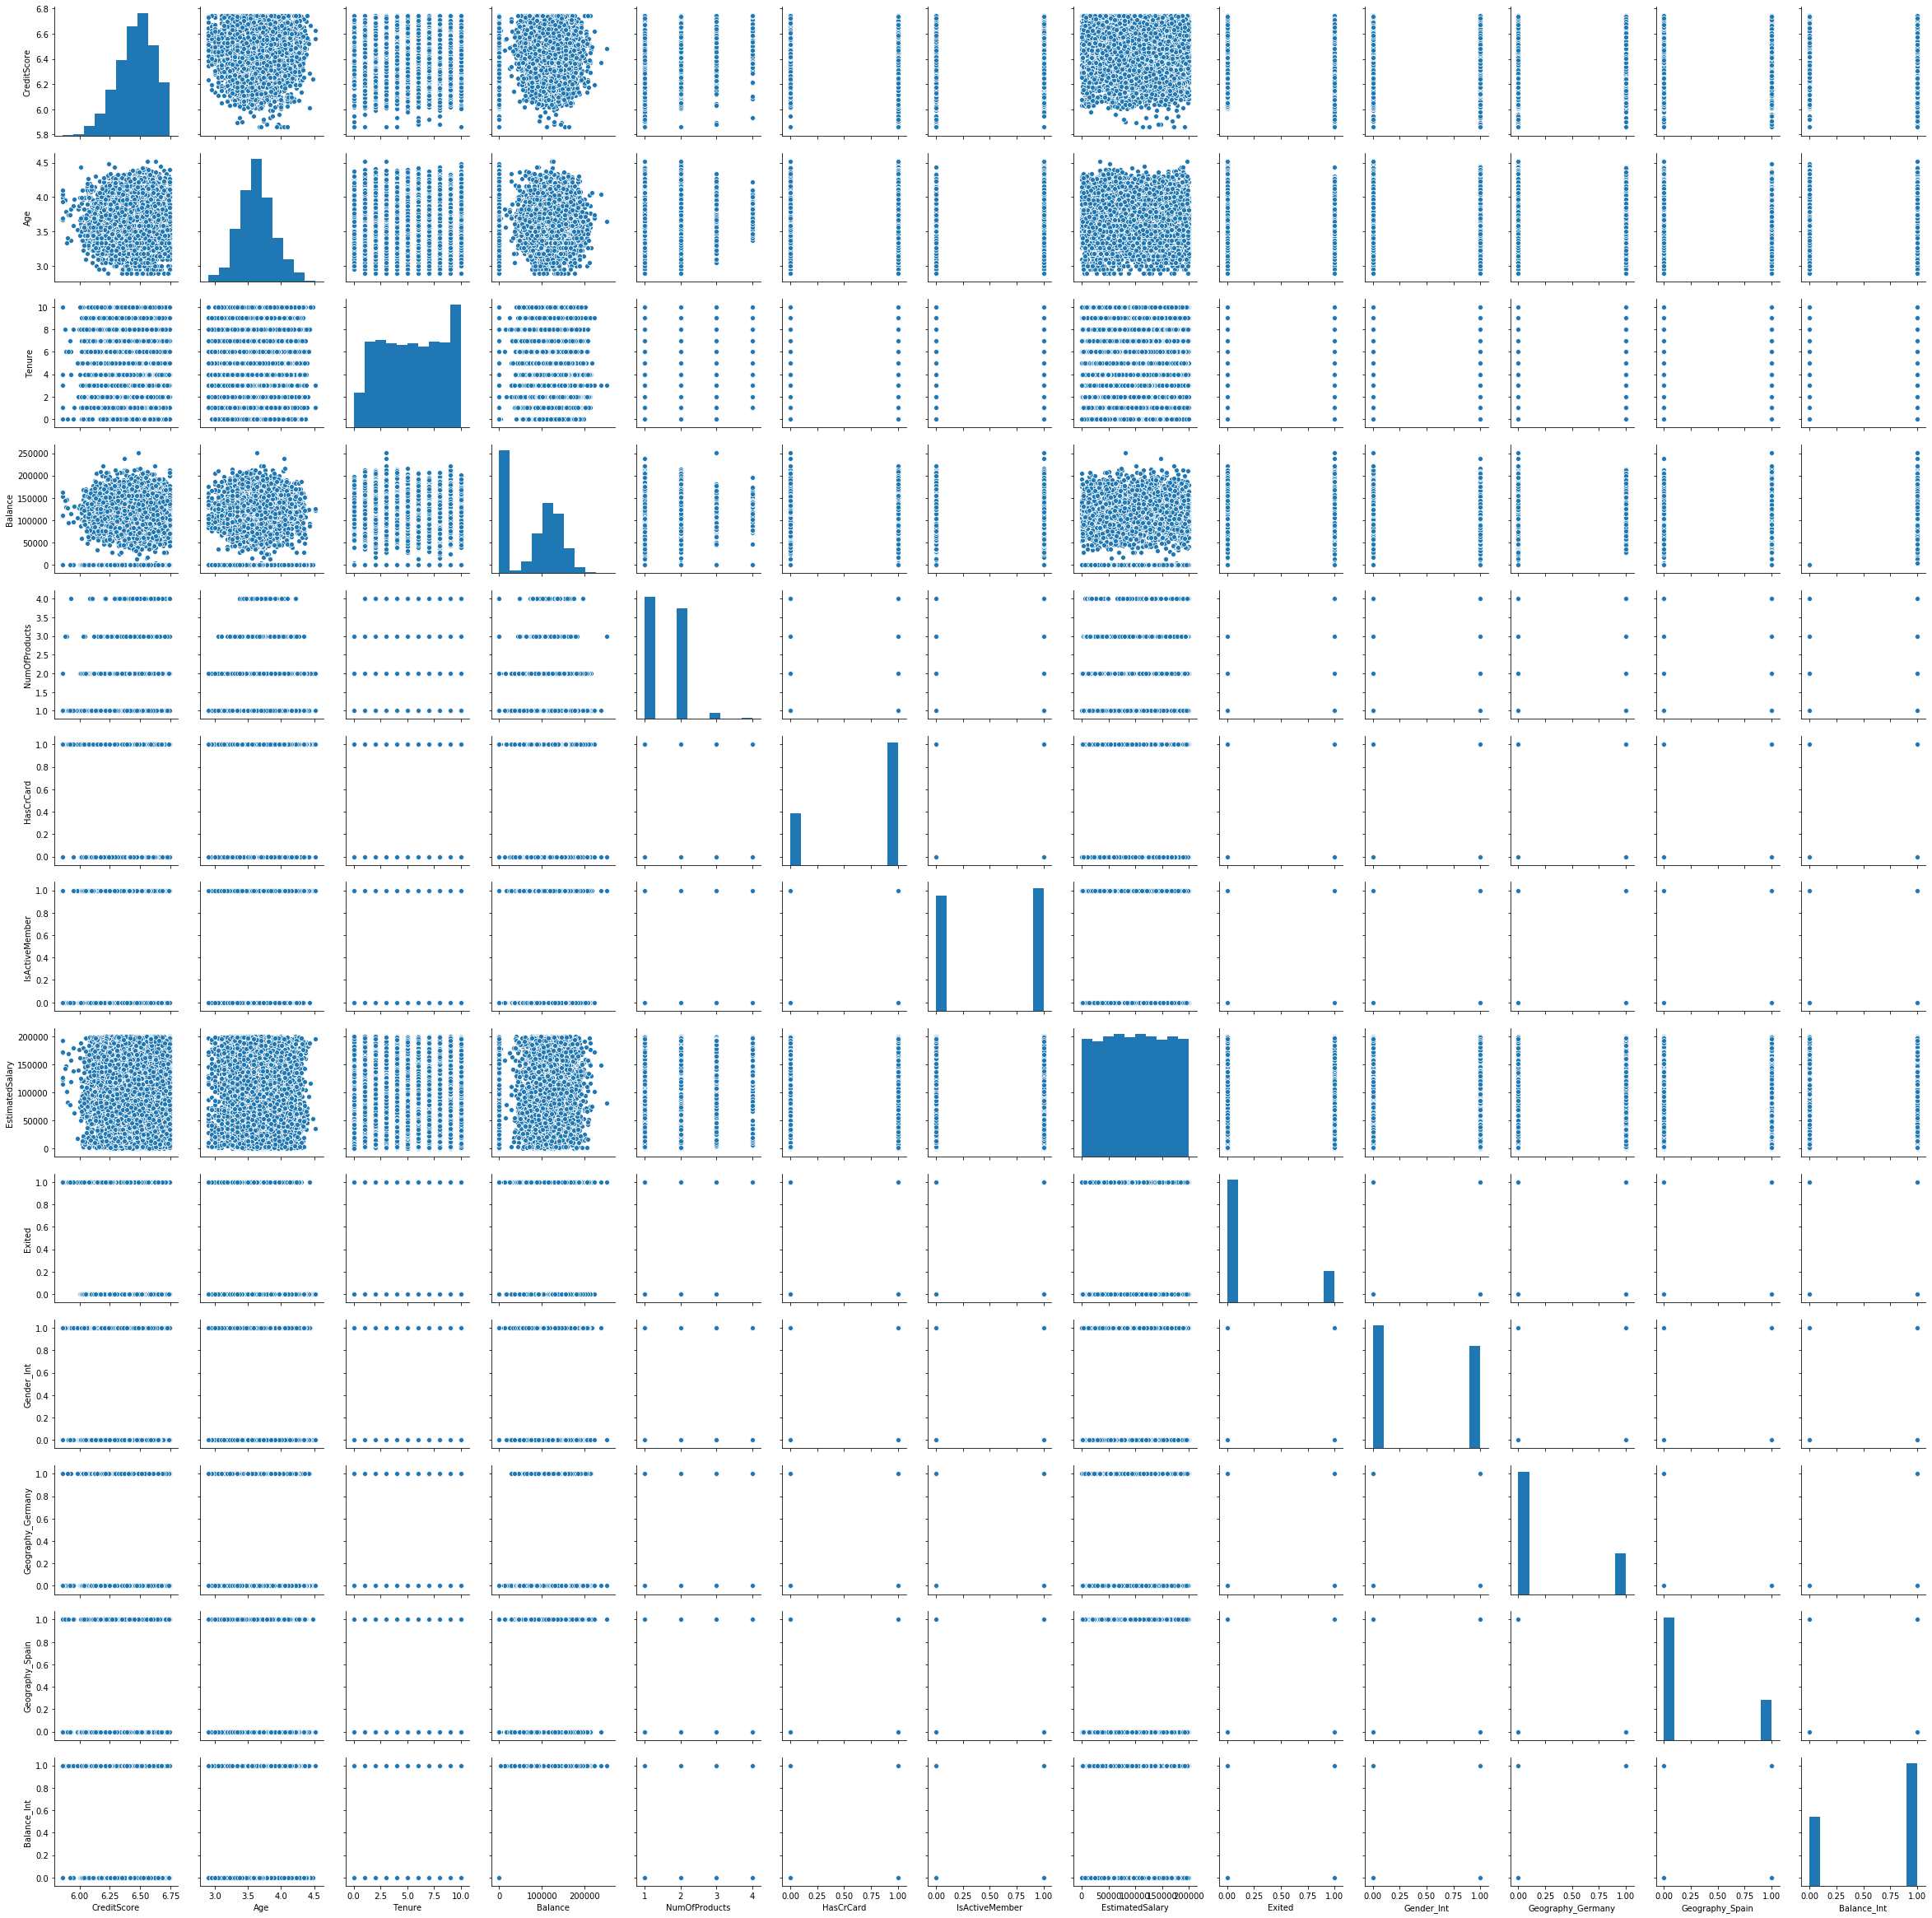

In [48]:
# Check correlation with log variables
sns.pairplot(churn_log);

We decide not to keep log variables as they do not get better with the transformation.

### Preprocessing variables (Normalization)
In our case, the technique used for scaling numerical data prior to modeling is normalization, and we'll use MinMax Scaler

In [49]:
# Get numeric variables to Standarize (all variables from Churn excpet for the index)
churn_numeric= churn.select_dtypes(include=np.number)
churn_numeric

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,1,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1


**MinMax Scaler**: This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [50]:
# MinMax Scaler

scaler = MinMaxScaler()

print("Fit \n",scaler.fit(churn_numeric))
print("Max \n",scaler.data_max_)
print("Transform \n",scaler.transform(churn_numeric))

Fit 
 MinMaxScaler()
Max 
 [8.5000000e+02 9.2000000e+01 1.0000000e+01 2.5089809e+05 4.0000000e+00
 1.0000000e+00 1.0000000e+00 1.9999248e+05 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00]
Transform 
 [[0.538      0.32432432 0.2        ... 0.         0.         0.        ]
 [0.516      0.31081081 0.1        ... 0.         1.         1.        ]
 [0.304      0.32432432 0.8        ... 0.         0.         1.        ]
 ...
 [0.718      0.24324324 0.7        ... 0.         0.         0.        ]
 [0.844      0.32432432 0.3        ... 1.         0.         1.        ]
 [0.884      0.13513514 0.4        ... 0.         0.         1.        ]]


In [51]:
# Assign the transformed data to a new variable
churn_norm= scaler.transform(churn_numeric)

In [52]:
churn_numeric.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Int',
       'Geography_Germany', 'Geography_Spain', 'Balance_Int'],
      dtype='object')

In [53]:
columns=['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_Int',
       'Geography_Germany', 'Geography_Spain', 'Balance_Int']

In [54]:
churn_norm=pd.DataFrame(churn_norm, columns=columns)
churn_norm

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,0.0,0.0,0.0,0.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0,0.0,1.0


In [55]:
# Save clean data to csv
churn_norm.to_csv("Churn_Norm.csv", index=False)

In [56]:
# summarize
print(churn_norm.describe())

        CreditScore           Age        Tenure       Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000  10000.000000   10000.000000   
mean       0.601058      0.282727      0.501280      0.304848       0.176733   
std        0.193307      0.141727      0.289217      0.248696       0.193885   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.468000      0.189189      0.300000      0.000000       0.000000   
50%        0.604000      0.256757      0.500000      0.387402       0.000000   
75%        0.736000      0.351351      0.700000      0.508749       0.333333   
max        1.000000      1.000000      1.000000      1.000000       1.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  \
count  10000.00000    10000.000000     10000.000000  10000.000000   
mean       0.70550        0.515100         0.500441      0.203700   
std        0.45584        0.499797         0.287580      0.402769   
min